# PROJECT 2: 

# Interaction between Skilled Health Assistance and Newborn and Maternal Mortality Rates

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This projects explores the connection between maternal mortality rates and newborn mortality rates with skilled health assistance at birth, and also with income inequality.

For this analysis, four indicators from the Gapminder World Dataset were selected:

- Newborn Mortality Rate - deaths per 1,000 live births in the first 28 days from pregnancy termination
- Maternal Mortality Ratio (IHME) - deaths per 100,000 live births within a year of pregnancy termination, due to a cause related to pregnancy or delivery
- Gini Coefficient for Income Inequality - 0 to 1 (lower being "more equal")
- Births Attended by Skilled Health Staff - percent of total deliveries attended by skilled health staff

The questions to be addressed in this analysis are as follows:

1. What countries have the highest and lowest maternal mortality rates in 2015?
2. How have maternal mortality rates changed over time worldwide?
3. How have maternal mortality rates changed in 26 years for each country? 
4. Which countries have increased/decreased their maternal mortality rates?
5. What countries have the highest and lowest newborn mortality rates in 2015?
6. How have newborn mortality rates changed over time worldwide?
7. How have newborn mortality rates changed in 26 years for each country? 
8. Which countries have increased/decreased their newborn mortality rates?
9. Are maternal mortality rates and newborn mortality rates correlated? How? 
10. Are maternal mortality rates and newborn mortality rates correlated with income inequality? How?
11. Are maternal mortality rates and newborn mortality rates correlated with skilled health assistanc? How?

_Note: "Skilled Health Staff" is defined as health personnel (doctors, nurses or midwives) trained in providing life-saving obstetric care, including giving the necessary supervision, care and advice to women during pregnancy, childbirth and the postpartum period, to conduct deliveries on their own, and to care for newborns._

In [106]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [107]:
# Load the four relevant datasets
df_maternal_original = pd.read_csv("mmr_ihme.csv")
df_maternal_original.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,496.00,468.00,442.00,434.00,435.00,437.00,441.00,448.0,456.00,...,417.00,396.00,373.00,353.00,335.00,318.00,302.00,289.00,281.00,267.00
1,Albania,28.50,27.00,23.40,20.40,17.30,16.40,15.30,13.8,12.30,...,9.13,8.76,8.47,8.26,7.98,7.75,7.58,7.46,7.33,7.18
2,Algeria,210.00,200.00,194.00,189.00,183.00,177.00,170.00,162.0,152.00,...,91.20,86.70,82.10,78.40,75.00,75.30,73.80,72.70,72.90,71.50
3,Andorra,2.67,2.59,2.57,2.58,2.59,2.52,2.45,2.4,2.34,...,2.10,2.08,2.06,2.00,1.95,1.88,1.92,1.92,1.90,1.88
4,Angola,322.00,315.00,311.00,317.00,320.00,307.00,278.00,267.0,278.00,...,238.00,233.00,227.00,219.00,211.00,205.00,199.00,198.00,193.00,186.00


In [108]:
df_newborn_original = pd.read_csv("newborn_mortality_rate_per_1000.csv")
df_newborn_original.head()

,country,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0,40.4,39.8,39.1,38.7,38.1,37.4,36.8,36.1,35.5
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,8.5,8.2,7.9,7.5,7.2,7.0,6.8,6.5,6.2
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.8,18.2,17.5,17.0,16.5,16.2,15.9,15.7,15.6,15.5
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,1.8,1.8,1.7,1.7,1.6,1.6,1.5,1.5,1.4
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.5,55.0,54.1,53.4,52.6,51.9,51.1,50.4,49.6,48.7


In [109]:
df_ineq_original = pd.read_csv("gini_original.csv")
df_ineq_original.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [110]:
df_assistance_original = pd.read_csv("births_attended_by_skilled_health_staff_percent_of_total.csv")
df_assistance_original.head()

,country,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.343,0.386,0.399,NaN,0.452,0.505,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,0.927,0.93,0.926,0.864,...,0.993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765,...,NaN,NaN,NaN,NaN,0.966,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000,1.000,NaN,1.000,1.000,1.000,NaN,NaN,NaN,NaN


In [111]:
# Check number of rows and columns for all data sets
df_maternal_original.shape, df_newborn_original.shape, df_ineq_original.shape, df_assistance_original.shape

((193, 31), (193, 66), (195, 242), (188, 36))

In [112]:
# Check data types for all datasets
df_maternal_original.dtypes

country     object
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
dtype: object

In [113]:
df_newborn_original.dtypes

country     object
1951       float64
1952       float64
1953       float64
1954       float64
            ...   
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
Length: 66, dtype: object

In [114]:
df_ineq_original.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2036       float64
2037       float64
2038       float64
2039       float64
2040       float64
Length: 242, dtype: object

In [115]:
df_assistance_original.dtypes

country     object
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
dtype: object

__Observation:__ As shown above, all datasets include floats in most columns, except for the column that contains the country name (string). Also, the results of the ```df.head()``` operations above suggest that our datasets may have missing data. In the next section, the extent of the missing data in all four datasets will be determined.

In [116]:
# Determine missing values per column per dataset
df_maternal_original.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
dtype: int64

In [117]:
df_newborn_original.isnull().sum()

country      0
1951       192
1952       184
1953       181
1954       175
          ... 
2011         0
2012         0
2013         0
2014         0
2015         0
Length: 66, dtype: int64

In [118]:
df_ineq_original.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2036       0
2037       0
2038       0
2039       0
2040       0
Length: 242, dtype: int64

In [119]:
df_assistance_original.isnull().sum()

country      0
1984       186
1985       187
1986       177
1987       171
1988       180
1989       156
1990       132
1991       140
1992       135
1993       131
1994       132
1995       110
1996       120
1997       118
1998       105
1999       107
2000        50
2001       105
2002        94
2003        86
2004        85
2005        84
2006        64
2007        83
2008        85
2009        86
2010        75
2011        86
2012        85
2013        91
2014        79
2015       116
2016       143
2017       176
2018       178
dtype: int64

__Observations:__ The sizes of two datasets (```df_newborn_original``` and ```df_ineq_original```) make it challenging to establish where exactly the missing values are. Therefore, we will examine the data frames with the operations below, which provide a list of those columns that have any missing values.

In [120]:
df_maternal_original.columns[df_maternal_original.isnull().any()]

Index([], dtype='object')

In [121]:
df_newborn_original.columns[df_newborn_original.isnull().any()]

Index(['1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989'],
      dtype='object')

In [122]:
df_ineq_original.columns[df_ineq_original.isnull().any()]

Index([], dtype='object')

In [123]:
df_assistance_original.columns[df_assistance_original.isnull().any()]

Index(['1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

__Observations:__ While both maternal mortality rate and income inequality datasets are complete, they differ in terms of the years included. On the other hand, newborn and skilled health assistance datasets do have missing values. However, the former has missing values only until 1989. Therefore, the timespan from 1990 to 2015 will be the range to explore in this analysis. 

The data set for skilled health assistance is the only dataset with a considerable number of missing values from 1990 to 2015, with at least 50 missing values every single year. Since dropping columns or rows based on the occurrence of missing values would leave us with no data frame, and filling empty values with means does not seem appropriate either, this data set will be left "uncleaned" for now and treated differently in the analysis below.

### Data Cleaning

In this section, we will create copies for all datasets and deal with missing values in these copies following the  operations below:

- Deletion of columns for the years prior to 1990 and subsequent to 2015
- Deletion of rows for countries that are not present accross datasets
- Deletion of duplicated rows, if any

In [124]:
# Create function that creates a copy for each data frame. The function takes a data frame list, creates an empty list 
# where the copies will be appended. Then, it loops through the df list and creates a copy of each df. It returns
# the list of new data frames
def copy_df(df_list):
    copy_list = []
    for df in df_list:
        copy_list.append(df.copy())
    return copy_list

In [125]:
# Apply copy_df() function to the list of data frames to copy and assign them to a new list of data frame names
df_maternal, df_newborn, df_ineq, df_assistance = copy_df([
    df_maternal_original,
    df_newborn_original,
    df_ineq_original,
    df_assistance_original
])

In [126]:
# Discard unnecessary columns in each copy
df_maternal.drop(columns=["2016", "2017", "2018", "2019"], inplace=True)
df_maternal.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,496.0,468.0,442.0,434.0,435.0,437.0,441.0,448.0,456.0,...,456.0,458.0,450.0,438.0,417.0,396.0,373.0,353.0,335.0,318.0


In [127]:
to_delete_newb = df_newborn.columns[df_newborn.isnull().any()]
df_newborn.drop(columns=to_delete_newb, inplace=True)
df_newborn.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,52.8,51.9,50.9,49.9,49.1,48.2,47.5,47.0,46.1,...,41.0,40.4,39.8,39.1,38.7,38.1,37.4,36.8,36.1,35.5


In [128]:
to_delete_ineq = df_ineq.iloc[:,1:191] + df_ineq.iloc[:,217:]
df_ineq.drop(columns=to_delete_ineq, inplace=True)
df_ineq.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,36.4,36.7,36.7,36.8,36.8,36.8,36.8,36.8,36.8,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8


In [129]:
to_delete_assis = df_assistance.iloc[:,1:7]
df_assistance.drop(columns=to_delete_assis, inplace=True)
df_assistance.drop(columns=["2016", "2017", "2018"], inplace=True)
df_assistance.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.189,NaN,0.24,NaN,0.343,0.386,0.399,NaN,0.452,0.505


In [130]:
# Confirm if there are still any missing values in the final range of columns.
df_maternal.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

In [131]:
df_newborn.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

In [132]:
df_ineq.isnull().sum()

country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

In [133]:
df_assistance.isnull().sum()

country      0
1990       132
1991       140
1992       135
1993       131
1994       132
1995       110
1996       120
1997       118
1998       105
1999       107
2000        50
2001       105
2002        94
2003        86
2004        85
2005        84
2006        64
2007        83
2008        85
2009        86
2010        75
2011        86
2012        85
2013        91
2014        79
2015       116
dtype: int64

In [134]:
# Confirm dataset shapes after deleting columns
df_maternal.shape, df_newborn.shape, df_assistance.shape, df_ineq.shape

((193, 27), (193, 27), (188, 27), (195, 27))

__Observations:__ We have now four datasets with data from 1990 to 2015. However, datasets differ slightly in the number of rows (countries) included. Thus, in the next section, we will make sure all datasets have no duplicated data, and that they include the same number of rows (same countries).

In [135]:
# Determine whether there are duplicated rows in each dataset
df_maternal.duplicated().sum(), df_newborn.duplicated().sum(), df_assistance.duplicated().sum(), df_ineq.duplicated().sum()

(0, 0, 0, 0)

__Observations:__ There are no duplicated data in any dataset. We now proceed to delete countries (rows) that are not present accross datasets.

In [136]:
# Find countries (rows) in maternal mortality rates dataset that are not present in newborn mortality rate dataset (and vice versa)
df_maternal[~df_maternal["country"].isin(df_newborn["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [137]:
df_newborn[~df_newborn["country"].isin(df_maternal["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


__Observations:__ Newborn mortality rate and maternal mortality rate datasets include the same countries, so no changes are necessary in this regard.

In [138]:
# Find countries (rows) in maternal mortality rates dataset that are not present in skilled assistance dataset (and vice versa)
df_assistance[~df_assistance["country"].isin(df_maternal["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [139]:
df_maternal[~df_maternal["country"].isin(df_assistance["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Andorra,2.67,2.59,2.57,2.58,2.59,2.52,2.45,2.40,2.34,...,2.25,2.21,2.18,2.16,2.10,2.08,2.06,2.00,1.95,1.88
66,Greece,4.45,5.02,5.65,2.65,3.73,3.33,4.84,3.13,6.93,...,4.69,5.18,2.71,6.09,6.99,6.42,5.07,3.68,4.98,4.86
111,Monaco,1.65,1.64,1.63,1.63,1.64,1.66,1.69,1.73,1.78,...,1.96,1.96,1.96,1.97,1.98,1.98,1.98,1.95,1.90,1.85
144,San Marino,2.51,2.48,2.46,2.42,2.37,2.31,2.24,2.21,2.20,...,2.68,2.66,2.64,2.63,2.62,2.60,2.62,2.62,2.63,2.63
159,Spain,8.93,8.06,8.25,7.06,6.89,6.16,5.53,5.43,5.12,...,4.34,3.99,4.73,4.36,4.62,3.97,3.36,4.41,3.34,3.94


__Observations:__ The data frame above shows those countries in the maternal mortality dataset that are not found in the skilled assistance dataset. Therefore, we need to delete these rows in the maternal mortality dataset AND in the newborn mortality dataset.

In [140]:
# Drop rows (countries) that are found in newborn and maternal mortality datasets but not in the skilled assistance dataset.
df_maternal.drop([3,66,111,144,159], inplace=True)
df_newborn.drop([3,66,111,144,159], inplace=True)
df_maternal.reset_index(drop=True, inplace=True)
df_newborn.reset_index(drop=True, inplace=True)

In [141]:
# Confirm the row drop came through correctly.
df_maternal[~df_maternal["country"].isin(df_assistance["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [142]:
# Double check the number of rows and columns.
df_maternal.shape, df_newborn.shape, df_assistance.shape, df_ineq.shape

((188, 27), (188, 27), (188, 27), (195, 27))

__Observations:__ Finally, we will examine which countries are found in the income inequality dataset but not in the others.

In [143]:
# Find countries (rows) in the skilled assisstance dataset that are not present in the income inequality dataset (and vice versa)
df_assistance[~df_assistance["country"].isin(df_ineq["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [144]:
df_ineq[~df_ineq["country"].isin(df_assistance["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
66,Greece,35.5,35.2,34.9,34.6,34.3,34.1,33.8,33.6,33.5,...,34.2,34.2,34.1,34.0,34.5,35.0,35.4,35.8,36.0,36.0
73,Holy See,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
98,Liechtenstein,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
113,Monaco,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
146,San Marino,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
161,Spain,34.7,34.9,34.9,34.5,34.2,33.8,33.3,32.8,32.4,...,33.5,33.9,34.4,34.8,35.1,35.5,35.7,35.9,36.0,36.2


__Observations:__ The data frame above shows the countries (rows) in the income inequality dataset that are not in the other datasets. We will drop those rows below.

In [145]:
df_ineq.drop([3,66,73,98,113,146,161], inplace=True)
df_ineq.reset_index(drop=True, inplace=True)
df_assistance.reset_index(drop=True, inplace=True)

In [146]:
# Double check rows were dropped
df_ineq[~df_ineq["country"].isin(df_assistance["country"])]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [147]:
# Final check of the number of rows and columns
df_maternal.shape, df_newborn.shape, df_assistance.shape, df_ineq.shape

((188, 27), (188, 27), (188, 27), (188, 27))

__Observations:__ At last, we have a consistent group of datasets that include the same countries (rows) and the same years (columns).

<a id='eda'></a>
## Exploratory Data Analysis

### What countries have the highest and lowest maternal mortality rates in 2015?

In [148]:
# Create function to make a horizontal bar plot with the values of all countries in a specific year 
#in a particular data frame. 
def per_country_bar_plot(df, year, plot_title, xaxis_label):
    sorted_2015 = df.sort_values(year)
    fig = px.bar(sorted_2015, x=year, y='country', hover_data={year:":.2f"}, height=3500,
             title= plot_title)

    fig.update_layout(
        font_family="Avenir",
        font_color="Black",
        title_font_family="Avenir",
        title_font_color="Dark Gray",
        font_size= 14,
        legend_title_font_color="Black"
    )

    fig.update_xaxes(title= xaxis_label, title_font_family="Avenir")
    fig.update_yaxes(title= "Country", title_font_family="Avenir")
    fig.show()

In [149]:
# Apply function to create a horizontal bar plot for the values of each country
per_country_bar_plot(df_maternal, "2015", "Maternal Deaths per 100,000 Births in 2015 per Country", "Number of Maternal Deaths");

__Observations:__ As the chart shows, the countries with the lowest maternal mortality rates include European countries such as Denmark, Estonia, Sweden, Norway, and Cyprus, while those with the highest rates include some African and Caribbean countries such as Liberia, Haiti, Sierra Leone, Guinea, and Mauritania.

### How have maternal mortality rates changed over time worlwide?

In [150]:
# Calculate the maternal mortality rate mean of all countries per year
mat_mean = df_maternal.mean()
mat_mean

1990    162.861170
1991    160.080638
1992    159.107979
1993    157.195106
1994    156.814574
1995    155.177553
1996    151.488085
1997    150.539574
1998    149.017553
1999    148.399894
2000    146.444362
2001    144.972394
2002    143.977287
2003    142.725532
2004    141.646330
2005    140.505585
2006    137.824202
2007    136.355160
2008    134.348989
2009    132.547819
2010    129.878617
2011    127.221649
2012    124.313245
2013    122.882926
2014    121.601809
2015    119.648830
dtype: float64

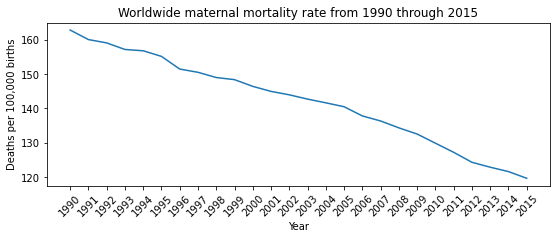

In [151]:
# Create plot with mean mortality rates
plt.figure(figsize=(9, 3))
plt.plot(mat_mean)
plt.xticks(rotation=45)

plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 births")
plt.title("Worldwide maternal mortality rate from 1990 through 2015");

__Observations:__ According to the chart, from 1990 to 2015, the number of maternal deaths within the first year since delivery (deaths  associated with birth) has decreased consistently worldwide, from 162.86 down to 119.64. 

### How have maternal mortality rates changed in 26 years for each country?

In [152]:
# Create a new column in the dataset with the mortality rate difference between 1990 and 2015.
df_maternal["difference"] = df_maternal["2015"] - df_maternal["1990"]
df_maternal.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,difference
0,Afghanistan,496.0,468.0,442.0,434.0,435.0,437.0,441.0,448.0,456.0,...,458.0,450.0,438.00,417.00,396.00,373.00,353.00,335.00,318.00,-178.00
1,Albania,28.5,27.0,23.4,20.4,17.3,16.4,15.3,13.8,12.3,...,10.8,10.5,9.67,9.13,8.76,8.47,8.26,7.98,7.75,-20.75
2,Algeria,210.0,200.0,194.0,189.0,183.0,177.0,170.0,162.0,152.0,...,104.0,100.0,96.50,91.20,86.70,82.10,78.40,75.00,75.30,-134.70
3,Angola,322.0,315.0,311.0,317.0,320.0,307.0,278.0,267.0,278.0,...,254.0,246.0,244.00,238.00,233.00,227.00,219.00,211.00,205.00,-117.00
4,Antigua and Barbuda,30.8,28.9,28.0,23.6,25.7,26.1,22.4,25.9,25.3,...,32.4,35.3,33.90,36.20,37.90,41.50,42.40,39.80,45.80,15.00


In [153]:
# Mean of the difference in maternal mortality rates between 1990 and 2015
df_maternal["difference"].mean()

-43.212340425531906

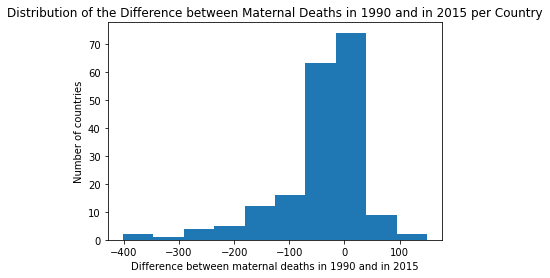

In [154]:
# Distribution of difference means per country.
df_maternal["difference"].hist()
plt.grid(False)
plt.title("Distribution of the Difference between Maternal Deaths in 1990 and in 2015 per Country")
plt.xlabel("Difference between maternal deaths in 1990 and in 2015")
plt.ylabel("Number of countries");

> According to the analysis, the mean of the difference between rates in 1990 and 2015 is -43.21. This means that worldwide, in average, we have decreased maternal mortality rates by more than 40 deaths a year. The histogram suggests that some countries have considerably decreased their rates (minus 200, 300 or 400 deaths a year), although some contries have increased their rate, as well. Let's see which countries are these in the following section.

### Which countries have increased/decreased their maternal mortality rates the most?

In [155]:
# Create a function for a horizontal bar plot that shows the values in the "difference" column in the data frames, 
# per country
def diff_per_country_bar_plot(df, plot_title):
    sorted_df = df.sort_values("difference")
    fig = px.bar(sorted_df, x='difference', y='country', hover_data={"difference":":.2f"}, height=3500,
             title= plot_title)

    fig.update_layout(
        font_family="Avenir",
        font_color="Black",
        title_font_family="Avenir",
        title_font_color="Dark Gray",
        font_size= 14,
        legend_title_font_color="Black"
    )

    fig.update_xaxes(title= "Change in Number of Deaths", title_font_family="Avenir")
    fig.update_yaxes(title= "Country", title_font_family="Avenir")
    fig.show()

In [156]:
# Apply diff_per_country_bar_plot() function to df_maternal
diff_per_country_bar_plot(df_maternal, "Changes in Maternal Deaths per 100,000 Births from 1990 to 2015 per Country");

__Observations:__ As the chart shows, the countries with highest improvement in maternal mortality rates include African countries such as Ethiopia and Mauritania, as well as countries from South East Asia such as Lao and Timor-Leste, and from South Asia, such as Maldives. On the other hand, those with the lowest improvement rates include Latvia, Kuwait, Slovenia, Ireland, and Motenegro.

In addition, countries that not only did not improve in mortality rates but worsened considerably include Lesotho, Sierra Leone, Democratic Republic of Congo, Zimbabwe, and Venezuela.

### What countries have the highest and lowest newborn mortality rates in 2015?

In [157]:
# Apply function to create horizontal bar plot with the values for all countries
per_country_bar_plot(df_newborn, "2015", "Newborn Deaths per 1,000 Births in 2015 per Country", "Number of Deaths");

__Observations:__ As the chart shows, the countries with the lowest newborn mortality rates include European countries such as Iceland and Luxembourg, and Asian countries such as Japan, Singapore, and Bahrain. The countries with the highest rates include some African and South Asian countries such as Angola, Pakistan, Central African Republic, Guinea-Bissau, and Somalia.

### How have newborn mortality rates changed over time worlwide?

In [158]:
# Calculate means of newborn mortality rates for each year, accross countries
newb_mean = df_newborn.mean()
newb_mean

1990    25.642553
1991    25.182447
1992    24.750000
1993    24.330319
1994    23.902128
1995    23.439362
1996    22.964362
1997    22.465957
1998    21.945213
1999    21.396277
2000    20.828191
2001    20.261170
2002    19.702128
2003    19.165957
2004    18.650532
2005    18.153723
2006    17.677128
2007    17.222340
2008    16.786170
2009    16.359043
2010    15.955851
2011    15.532447
2012    15.123404
2013    14.728191
2014    14.342021
2015    13.971809
dtype: float64

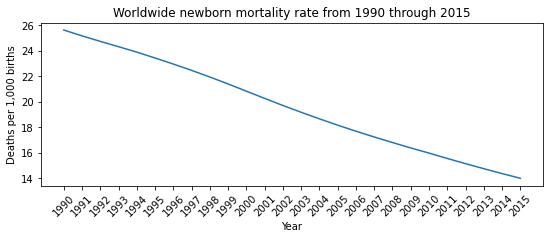

In [159]:
# Plot means over time
plt.figure(figsize=(9, 3))
plt.plot(newb_mean)
plt.xticks(rotation=45)

plt.xlabel("Year")
plt.ylabel("Deaths per 1,000 births")
plt.title("Worldwide newborn mortality rate from 1990 through 2015");

__Observations:__ According to this chart, similarly to maternal mortality rates, newborn mortality rates have also decreased consistently from 1990 to 2015.

### How have newborn mortality rates changed in 26 years for each country?

In [160]:
# Create new column in the dataframe with the difference for each country between the rates in 1990 and in 2015
df_newborn["difference"] = df_newborn["2015"] - df_newborn["1990"]
df_newborn.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,difference
0,Afghanistan,52.8,51.9,50.9,49.9,49.1,48.2,47.5,47.0,46.1,...,40.4,39.8,39.1,38.7,38.1,37.4,36.8,36.1,35.5,-17.3
1,Albania,13.4,13.2,13.0,12.9,12.9,12.7,12.5,12.3,11.9,...,8.5,8.2,7.9,7.5,7.2,7.0,6.8,6.5,6.2,-7.2
2,Algeria,22.4,22.1,22.0,21.8,21.7,21.5,21.3,21.1,21.0,...,18.2,17.5,17.0,16.5,16.2,15.9,15.7,15.6,15.5,-6.9
3,Angola,59.1,59.2,59.4,59.4,59.3,59.4,59.5,59.4,58.9,...,55.0,54.1,53.4,52.6,51.9,51.1,50.4,49.6,48.7,-10.4
4,Antigua and Barbuda,14.7,14.1,13.5,12.9,12.3,11.7,11.2,10.7,10.3,...,6.9,6.6,6.3,6.0,5.8,5.5,5.3,5.1,4.9,-9.8


In [161]:
# Mean of the difference in newborn mortality rates between 1990 and 2015, and histogram
df_newborn["difference"].mean()

-11.670744680851064

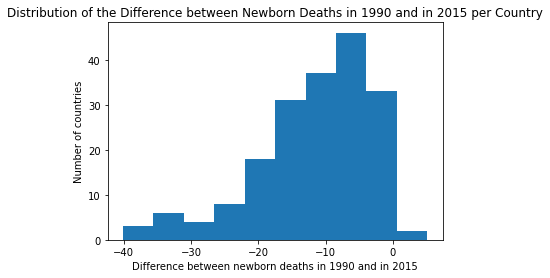

In [162]:
df_newborn["difference"].hist()
plt.grid(False)
plt.title("Distribution of the Difference between Newborn Deaths in 1990 and in 2015 per Country")
plt.xlabel("Difference between newborn deaths in 1990 and in 2015")
plt.ylabel("Number of countries");

__Observations:__ According to the analysis, the mean of the difference between rates in 1990 and 2015 is -11.67. This means that in average, worlwide, we have decrease newborn mortality rates by around 11 deaths a year. The histogram suggests that some countries have considerably decreased their rates (minus 30 or 40 deaths a year). Now, a limited number of countries seem to have increased the mortality rates. Let's see which countries are these in the following section.

### What countries have increased/decreased their newborn mortality rates?

In [163]:
# Apply diff_per_country_bar_plot() function to df_newborn
diff_per_country_bar_plot(df_newborn, "Changes in Newborn Deaths per 1,000 Births from 1990 to 2015 per Country");

__Observations:__ As the chart shows, the countries with highest improvement in newborn mortality rates include South Asian countries such as Bangladesh, Maldives, and Nepal, as well as African countries such as Mali and Mozambique. On the other hand, those with the lowest improvement rates include South Korea, Switzerland, New Zealand, Canada, and Germany.

Finally, only two countries worsened in their newborn mortality rates: Dominica and Zimbabwe.

### Are maternal mortality rates and newborn mortality rates correlated? How?

In this section, we will start exploring how maternal and newborn mortality rates correlate with each other and with other variables.

In [164]:
# Clean datasets from columns that will not be used anymore, as preparation for the analyses that follow.
df_maternal.drop(columns="difference", inplace=True)
df_newborn.drop(columns="difference", inplace=True)

In [165]:
# Create a new column in each data frame with the average rate for maternal mortality and newborn mortality, per country
df_maternal["Maternal avg"] = df_maternal.mean(axis=1)
df_maternal.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Maternal avg
0,Afghanistan,496.0,468.0,442.0,434.0,435.0,437.0,441.0,448.0,456.0,...,458.0,450.0,438.0,417.0,396.0,373.0,353.0,335.0,318.0,433.192308


In [166]:
df_newborn["Newborn avg"] = df_newborn.mean(axis=1)
df_newborn.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Newborn avg
0,Afghanistan,52.8,51.9,50.9,49.9,49.1,48.2,47.5,47.0,46.1,...,40.4,39.8,39.1,38.7,38.1,37.4,36.8,36.1,35.5,43.573077


In [167]:
# Create a new data frame with both of the average columns created above
mat_ave = df_maternal["Maternal avg"]
new_ave = df_newborn["Newborn avg"]
mat_new_corr = pd.concat([mat_ave, new_ave], axis=1)
mat_new_corr.head()

,Maternal avg,Newborn avg
0,433.192308,43.573077
1,13.339231,10.142308
2,132.315385,19.434615
3,265.153846,56.103846
4,30.853846,8.903846


In [168]:
# Confirm there are no missing values
mat_new_corr.isnull().any()

Maternal avg    False
Newborn avg     False
dtype: bool

In [169]:
# Calculate the correlation (Pearson) between maternal mortality and newborn mortality rate averages per country.
x = mat_new_corr["Maternal avg"]
y = mat_new_corr["Newborn avg"]

stats.pearsonr(x,y) 

(0.847945536548088, 3.6757788772545945e-53)

__Observations:__ As the charts above suggest, maternal and newborn mortality rates are strongly, positively, and significantly correlated. This means that the more maternal deaths, the more newborn deaths.

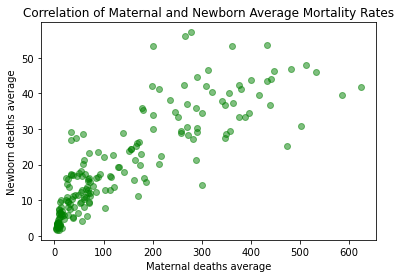

In [170]:
# Create a scatter plot depicting the correlation
x = mat_new_corr["Maternal avg"]
y = mat_new_corr["Newborn avg"]

plt.scatter(x, y, c="green", alpha=0.5)
plt.title("Correlation of Maternal and Newborn Average Mortality Rates")
plt.xlabel("Maternal deaths average")
plt.ylabel("Newborn deaths average");

### Are maternal mortality and newborn mortality rates correlated with income inequality? How?

In [171]:
# Create a column in the income inequality data frame with the rate average per country
df_ineq["Inequality avg"] = df_ineq.mean(axis=1)
df_ineq.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Inequality avg
0,Afghanistan,36.4,36.7,36.7,36.8,36.8,36.8,36.8,36.8,36.8,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.776923
1,Albania,27.0,27.0,27.0,27.0,27.0,27.2,27.5,28.0,28.6,...,30.2,30.0,29.7,29.5,29.3,29.1,29.0,29.0,29.0,29.061538
2,Algeria,38.8,38.1,37.4,36.7,36.1,35.5,34.9,34.4,34.0,...,29.9,29.4,29.0,28.5,28.2,27.9,27.7,27.6,27.6,32.196154
3,Angola,52.9,52.8,52.8,52.7,52.6,52.5,52.4,52.3,52.2,...,45.0,44.1,43.4,42.9,42.7,42.6,42.6,42.6,42.6,48.430769
4,Antigua and Barbuda,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.000000


In [172]:
# Add the new average column to the dataframe created above with averages from maternal and newborn mortality rates
ineq_ave = df_ineq["Inequality avg"]
ineq_mat_new_corr = pd.concat([mat_new_corr, ineq_ave], axis=1)

In [173]:
# Confirm ther are no missing values
ineq_mat_new_corr.isnull().any()

Maternal avg      False
Newborn avg       False
Inequality avg    False
dtype: bool

In [174]:
# Calculate correlation between maternal mortality rate and income inequality
x1 = ineq_mat_new_corr["Maternal avg"]
y1 = ineq_mat_new_corr["Inequality avg"]

stats.pearsonr(x1,y1) 

(0.31389810638370175, 1.151173074038566e-05)

In [175]:
# Calculate correlation between newborn mortality rate and income inequality
x2 = ineq_mat_new_corr["Newborn avg"]
y1 = ineq_mat_new_corr["Inequality avg"]
stats.pearsonr(x2,y1) 

(0.30062787201702534, 2.766376854000773e-05)

__Observations:__ These analyses showed a low positive correlation between income inequality and maternal mortality rate, and also with newborn mortality rate. This correlation is positive since the higher the mortality rates, the higher the inequality index, which - as we already stated - is lower for "more equal" countries. 

The following plot shows the relationship between maternal mortality rate, newborn mortality rate and income inequality. 

In [176]:
# Plot relationship between newborn and mother mortality rates and inequality
ineq_rounded = ineq_mat_new_corr.round(decimals=2)
graph = px.scatter(ineq_rounded, x = "Maternal avg", y = "Newborn avg",opacity=0.7,color="Inequality avg", title="Relationship between Newborn and Maternal Mortality and Inequality per Country", labels={
                     "Maternal avg": "Avg Maternal Mortality Rate",
                     "Newborn avg": "Avg Newborn Mortality Rate",
                     "Inequality avg": "Avg Gini Inequality Index"
                 }) 
graph.update_layout(plot_bgcolor='white')
graph.show()

### Are maternal mortality and newborn mortality rates correlated with skilled health assistance? How?
__Observations:__ In this section, we will explore the relationship between mortality rates and the assistance of skilled health professionals. Since the dataset on the later has many missing values, the data frame will be unpivoted and joined with the corresponding data from the all other datasets. Then, correlations will be calculated with the available data. 

In [177]:
# Display dataset to unpivot
df_assistance.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.189,NaN,0.24,NaN,0.343,0.386,0.399,NaN,0.452,0.505
1,Albania,0.93,0.926,0.864,0.872,0.891,0.891,0.912,0.988,0.991,...,0.990,NaN,NaN,0.993,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,0.765,NaN,NaN,NaN,NaN,NaN,NaN,...,0.952,NaN,NaN,NaN,NaN,NaN,NaN,0.966,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,0.225,NaN,NaN,...,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,1.000,1.000,NaN,1.000,...,0.999,1.000,1.00,1.000,1.000,NaN,1.000,1.000,1.000,NaN


In [178]:
# Unpivot the dataset
assis_unpiv = pd.melt(df_assistance, id_vars =['country'])
assis_unpiv.rename(columns={"value":"Skilled assistance"}, inplace=True)
assis_unpiv.head()

,country,variable,Skilled assistance
0,Afghanistan,1990,NaN
1,Albania,1990,0.93
2,Algeria,1990,NaN
3,Angola,1990,NaN
4,Antigua and Barbuda,1990,NaN


In [179]:
assis_unpiv.shape

(4888, 3)

In [180]:
# Drop rows with emmpty values
assis_unpiv.dropna(axis=0, inplace=True)

In [181]:
assis_unpiv.shape

(2304, 3)

In [182]:
# Confirm final number of countries included in the dataset
assis_unpiv.nunique()

country               186
variable               26
Skilled assistance    454
dtype: int64

In [183]:
# Unpivot all remaining datasets
maternal_unpiv = pd.melt(df_maternal, id_vars =['country'])
newborn_unpiv = pd.melt(df_newborn, id_vars =['country'])
ineq_unpiv = pd.melt(df_ineq, id_vars =['country'])

In [184]:
# Rename column header for columns that will be merged below
maternal_unpiv.rename(columns={"value":"Maternal Mortality"}, inplace=True)
newborn_unpiv.rename(columns={"value":"Newborn Mortality"}, inplace=True)
ineq_unpiv.rename(columns={"value":"Inequality"}, inplace=True)

In [185]:
# Merge skilled health assistance data frame with three other data frames
combined1 = assis_unpiv.merge(maternal_unpiv, how="left", on=['country','variable'])
combined2 = combined1.merge(newborn_unpiv, how="left", on=['country','variable'])
final_combined = combined2.merge(ineq_unpiv, how="left", on=['country','variable'])

In [186]:
final_combined.shape

(2304, 6)

In [187]:
# Confirm the number of countries has been maintained
final_combined.nunique()

country                186
variable                26
Skilled assistance     454
Maternal Mortality    1253
Newborn Mortality      446
Inequality             379
dtype: int64

In [188]:
# Confirm the result of the merge
final_combined.head()

,country,variable,Skilled assistance,Maternal Mortality,Newborn Mortality,Inequality
0,Albania,1990,0.930,28.5,13.4,27.0
1,Argentina,1990,0.969,65.7,15.4,46.1
2,Armenia,1990,0.997,38.5,23.0,41.9
3,Azerbaijan,1990,0.973,36.7,35.9,33.4
4,Bahamas,1990,0.990,57.8,14.0,44.2


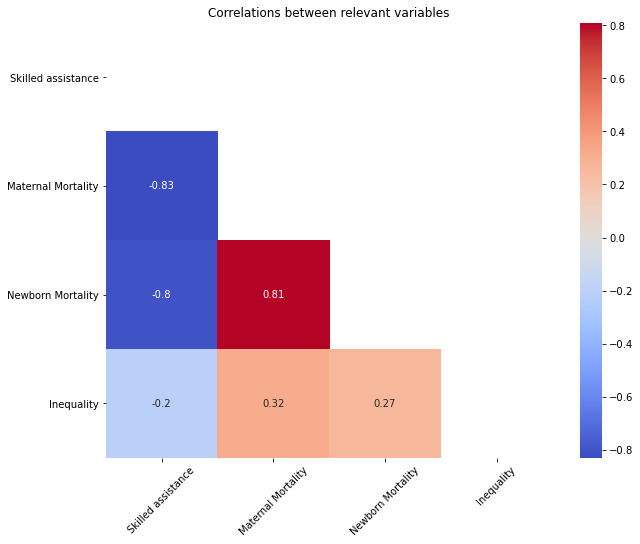

In [189]:
fig = plt.figure(figsize = [10,8])
matrix = np.triu(final_combined.corr())
sb.heatmap(final_combined.corr(), annot = True, cmap = 'coolwarm', mask=matrix, )
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title("Correlations between relevant variables");

In [190]:
# Plot relationship between mother deaths and assistance
graph = px.scatter(final_combined, x = "Maternal Mortality", y = "Skilled assistance", title="Relationship between Maternal Mortality and Professional health Assistance at Birth", opacity = 0.4, labels={
                     "Maternal Mortality": "Avg Maternal Mortality Rate",
                     "Skilled assistance": "% births with professional health assistance (0 to 1)"
                 }) 
graph.update_layout(plot_bgcolor='white')
graph.show()

In [191]:
# Plot relationship between newborn deaths and assistance
graph = px.scatter(final_combined, x = "Newborn Mortality", y = "Skilled assistance", title="Relationship between Newborn Mortality and Professional health Assistance at Birth", opacity = 0.4, labels={
                     "Newborn Mortality": "Avg Newborn Mortality Rate",
                     "Skilled assistance": "% births with professional health assistance (0 to 1)"
                 }) 
graph.update_layout(plot_bgcolor='white')
graph.show()

__Observations:__ According to the calculations and scatter plots, there is a strong, negative, and signiticant correlation between skilled health assistance for pregnancy and maternal mortality rate, as well as between the former and newborn mortality rates. This means that the higher the proportion of pregnancies/deliveries supported by skilled health professionals, the fewer the deaths, both for mothers and newborns. 

<a id='conclusions'></a>
## Conclusions


The data analyzed in this project focused on the interaction of worldwide maternal and newborn mortality rates, skilled health assistance during pregnancy, delivery and post-partum, and income inequality.

In terms of maternal mortality rates, European countries showed the lowest rates, while some African countries and countries in the Caribbean showed the highest. Regarding newborn mortality rates, the lowest rates were observed in European and some Asian countries such as Japan, Bahrain and Singapore, and the highest rates were observed in some African and South Asian countries.

Across the timespan analyzed (1990 - 2015), both the number of maternal deaths within the first year since delivery (deaths associated with birth) and the number of newborn deaths have decreased consistently worldwide. 

In terms of the improvement - or lack thereof - made by individual countries, the countries with the highest improvement in maternal mortality rates include some African countries and countries from South East and South Asia. Likewise, those with highest improvement in newborn mortality rates include South Asian and African countries. On the other hand, countries such as Latvia, Kuwait, Slovenia, Ireland, and Motenegro showed the lowest improvement in maternal mortality rate, while countries such as South Korea, Switzerland, New Zealand, Canada, and Germany did so regarding newborn mortality rates. Finally, maternal mortality rates in countries such as Lesotho, Sierra Leone, Democratic Republic of Congo, Zimbabwe, and Venezuela worsened considerably, while only two countries in the dataset showed a regression from 1990: Dominica and Zimbabwe.

It is important to note that those countries that made low improvement or that even showed a slight increase in the mortality rates (e.g. Sweden, New Zealand, Canada, Singapore, Costa Rica), that show low improvement. It is difficult to state for sure in the absence of more context, but it is possible to suggests that this is mostly because these countries already had a low mortality rate, and so a few deaths a year would greatly affect their baseline.

The second section of the Exploratory Analysis focused on the interaction among variables.

As it could have been expected, maternal and newborn mortality rates are strongly, positively correlated. On the other hand, calculating the correlation between those two variables and income inequality yielded a low correlation. This low correlation was somewhat unexpected, since people tend to associate successful deliveries and post-partum care with the possibility to access health resources. It is sometimes assumed that countries with higher inequality may fail to provide those resources accross the board for the whole population. This popular notion is not supported by these data.

Finally, the data showed that there is a strong relationship between mortality rates - both maternal and newborn - and the assistance of health professionals during pregnancy, delivery and post-partum. According to the analysis, the higher the proportion of pregnancies/deliveries supported by skilled health professionals, the fewer the deaths, both for mothers and newborns.

### Limitations

This analysis has two important limitations:

> First, since the dataset of skilled health assistance was far from complete, it is important to view with caution the results regarding the relation between mortality rates and skilled health assistance calculation. This is because the reasons why only the data for some years and some countries were possible to be collected could also be the source of an underlying bias.

> Second, since I lack the specialized background and broader view of the data collection process, there is the possibility that I misunderstood some information and missed opportunities of more interesting analysis.

